# Repeated Random Sampling

Approximating Distributions & Estimating Pi Using Monte Carlo Techniques
in Python

Kabui, Charles  
2025-05-15

**Random Sampling** is a fundamental statistical technique for selecting
a subset of data from a larger population. Each sample is chosen
randomly and independently. It’s crucial in statistics and data science
for providing unbiased insights.

**Repeated Random Sampling** is emphasized because a single sample may
not represent the population well. By repeating the sampling process
many times, variability is reduced, improving the approximation of true
population parameters and leading to more robust estimates. This process
forms the basis for bootstrapping and **Monte Carlo simulations**.

**Monte Carlo methods** are computational algorithms that use random
sampling to obtain numerical results, often useful when deterministic
methods are too complex. They rely on generating random numbers as
inputs, running simulations multiple times, representing uncertainty
with probability distributions, and analyzing outputs.

A key application is **Approximating Distributions**. Thousands of
random samples can be simulated from a distribution to understand its
behavior, visualize histograms, calculate statistics, and construct
confidence intervals. This involves using pseudo-random number
generation to transform uniformly distributed numbers into desired
distributions.

Repeated sampling helps identify patterns and converge to population
characteristics. These techniques are also relevant to **Hypothesis
Testing And Estimation**.

A classic Monte Carlo application is **Estimating Pi**. This involves
simulating random points within a unit square with an inscribed quarter
circle. The ratio of points falling inside the quarter circle (where
$x^2 + y^2 \leqslant 1$) to the total number of points approximates
$\frac{\pi}{4}$. As the number of points ($N$) increases, the estimate
becomes more accurate. Visualizing these points shows the quarter circle
becoming more defined with more samples.

**Error Analysis and Convergence** show that the error between the
estimated and true `Pi` decreases as `N` increases. This convergence
follows a law where the Error is proportional to $\frac{1}{\sqrt{N}}$.
This indicates that while increasing N improves precision, there are
diminishing returns.

Estimated Pi: 3.11560

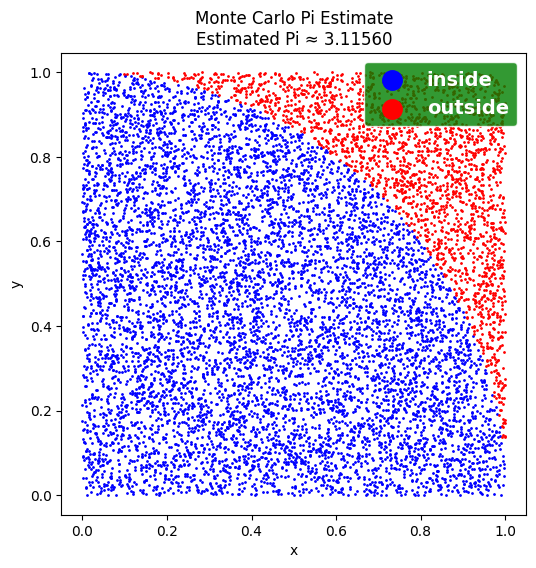

In [56]:
import random
import matplotlib.pyplot as plt

N = 10000
x, y = (
    [random.random() for _ in range(N)], 
    [random.random() for _ in range(N)])
inside = [
    (x[i], y[i]) 
    for i 
    in range(N) if x[i]**2 + y[i]**2 <= 1]
pi = 4 * len(inside) / N
print(f"Estimated Pi: {pi:.5f}")

plt.figure(figsize=(6,6))
plt.scatter(
    *zip(*inside), 
    color='blue', 
    s=1, 
    label='inside')
plt.scatter(
    *zip(*[(x[i], y[i]) for i in range(N) if (x[i], y[i]) not in inside]), 
    color='red', 
    s=1, 
    label='outside')
plt.legend(
    loc = "upper right", 
    facecolor="green", 
    edgecolor='white', 
    markerscale=14,
    labelcolor='white',
    prop={'weight': 'bold', 'size': 14})
plt.title(f"Monte Carlo Pi Estimate\nEstimated Pi ≈ {pi:.5f}")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

Beyond estimating Pi, **Monte Carlo and random sampling** methods are
used in various domains, including numerical integration, financial risk
modeling, physics simulations, and importantly for data science,
**predictive analytics and machine learning** (e.g., bagging).

## Examples

### Estimating π with Random Sampling

You are designing a simulation to estimate the value of $\pi$ using
`100,000` random points uniformly sampled inside a unit square.  
How accurate is your estimate compared to the true value of $\pi$?  
Use random sampling and compare the estimate over `10` different runs.

#### Solution

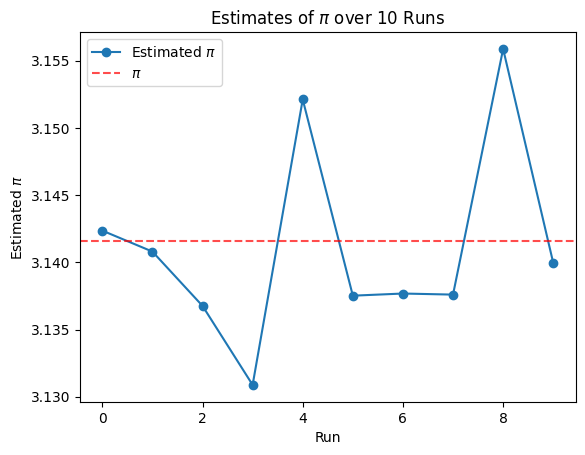

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown

estimates = []
for _ in range(10):
    x, y = np.random.rand(100000), np.random.rand(100000)
    pi_estimate = 4 * np.mean(x**2 + y**2 <= 1)
    estimates.append(pi_estimate)

Markdown(f"Estimates of $\pi$ from 10 runs:\n{np.array(estimates).tolist()}")
# Plotting the estimates
plt.plot(estimates, marker='o', label='Estimated $\pi$')
plt.axhline(np.pi, color='r', linestyle='--', label='$\pi$', alpha=0.7)
plt.title('Estimates of $\pi$ over 10 Runs')
plt.ylabel('Estimated $\pi$')
plt.xlabel('Run')
plt.legend()
plt.show()

The estimate of $\pi$ is around the true value of $\pi$ (3.14159) with a
margin of error.

### Estimating the Mean of a Normal Distribution

Suppose you repeatedly draw `1,000` samples of size `50` from a normal
distribution with mean $\mu = 10$ and standard deviation $\sigma = 2$.  
What does the distribution of the sample means look like?  
Plot a histogram of the sample means and compute the overall average and
standard deviation.

#### Solution

Average of means: 10.0075
Std dev of means: 0.2896

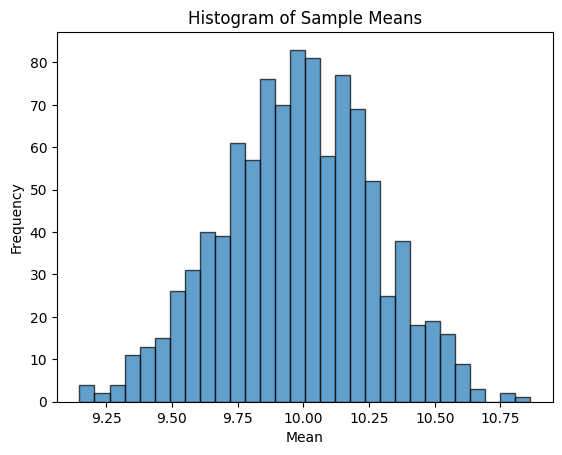

In [33]:
means = [np.mean(np.random.normal(10, 2, 50)) for _ in range(1000)]

print(f"Average of means: {np.mean(means):.4f}")
print(f"Std dev of means: {np.std(means):.4f}")

# Plotting the histogram of sample means
plt.hist(means, bins=30, edgecolor='black', align='left', alpha=0.7)
plt.title('Histogram of Sample Means')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.show()

**Average of means $\approx$ 10**

This aligns well with the true population mean ($\mu$ = 10), as expected
from the **Law of Large Numbers**.

**Standard deviation of means $\approx$ 0.2896**

This closely matches the **theoretical standard error**:

$\text{SE} = \frac{\sigma}{\sqrt{n}} = \frac{2}{\sqrt{50}} \approx 0.2828$

This shows that your sampling distribution of the mean is behaving
exactly as it should.

### Estimating Dice Probability

Two fair six-sided dice are rolled.  
Using 100,000 simulations, estimate the probability that the sum of the
two dice is greater than 9.  
How close is this to the theoretical probability?

#### Solution

Theoretical probability:

There are 6 outcomes \> 9 out of 36 possible outcomes

When rolling two dice, the sum can be greater than 9 in these cases:

-   **Sum of 10:** (`4,6`), (`5,5`), (`6,4`)
-   **Sum of 11:** (`5,6`), (`6,5`)
-   **Sum of 12:** (`6,6`)

$P(\text{sum} > 9) = \frac{6}{36} = 0.1667$

In [21]:
sums = np.random.randint(1, 7, (100000, 2)).sum(axis=1)
prob = np.mean(sums > 9)
print(f"Estimated P(sum > 9): {prob:.4f}")
print(f"Theoretical P(sum > 9): {6/36:.4f}") 

Estimated P(sum > 9): 0.1661
Theoretical P(sum > 9): 0.1667

The estimated probability from the simulation is close to the
theoretical probability, with a small margin of error, due to **random
sampling error**.